<a href="https://colab.research.google.com/github/wamaithaNyamu/RUNDAHOUSES/blob/master/Runda_Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# INTRODUCTION

Runda is a surburb in the heart of Nairobi. Its an estate of the who is who in the country. Due to the status quo of the class of citizens that live here, it is exepected that the price of land and houses are off the roof (well, from the common mwananchis perspective anyway). This notebook walks through investigating housing prices in Runda. The data has been scrapped from [BuyRentKenya](https://www.buyrentkenya.com/houses-for-sale/westlands/runda?page=1). Download the csv from [here]() .Find a step by step tutorial for the webscrapping [here](https://wamaithanyamu.com/categories/runda-houses/).



# LOAD THE DATA

First import the necessary libraries

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We load the data from the csv file runda_houses.csv and convert it to a dataframe

In [3]:
df = pd.read_csv('/content/runda-houses.csv')
df.head(2)

,_id,url,__v,area,baths,beds,cars,description,externalFeatures,generalFeatures,internalFeatures,price
0,5f5d1a3e1e441dbaa36b1273,https://www.buyrentkenya.com/listings/6-bed-ho...,0,2428,8,6,0,\n6 bedroom houseAll rooms en-suiteSitting on ...,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],85000000
1,5f5d1a3f1e441dbaa36b132c,https://www.buyrentkenya.com/listings/4-bed-ho...,0,6001,3,4,0,\nUnbelievable!!Yet a unique house with charac...,"[' Fence ', ' Garden ']","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",75000000


In [4]:
df.tail(2)

,_id,url,__v,area,baths,beds,cars,description,externalFeatures,generalFeatures,internalFeatures,price
140,5f5d202b1e441dbaa36e9b15,https://www.buyrentkenya.com/listings/5-bed-ho...,0,0,0,5,0,\nIts a magnificent 5bdrm unfurnished ambassad...,[],[],[],140000000
141,5f5d202c1e441dbaa36e9b93,https://www.buyrentkenya.com/listings/6-bed-to...,0,0,7,6,0,\n6 Bedroom Ambassadorial House for saleAll en...,[],[],[],0


# DATA CLEANING

The data needs alot of cleaning inorder to be useful for analysis. Some values are NaN while others are None. The features are also in form of lists and some are also missing. 

### Drop unnecesaary columns

We do not need the url , _id, and the _v columns so we will drop them for they only add clutter to he data we have

In [5]:
# drop columns

df =df.drop(['_id', 'url', '__v'], axis=1)
df.head(2)

,area,baths,beds,cars,description,externalFeatures,generalFeatures,internalFeatures,price
0,2428,8,6,0,\n6 bedroom houseAll rooms en-suiteSitting on ...,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],85000000
1,6001,3,4,0,\nUnbelievable!!Yet a unique house with charac...,"[' Fence ', ' Garden ']","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",75000000


In [6]:
df.isna().sum()

area                0
baths               0
beds                0
cars                0
description         0
externalFeatures    0
generalFeatures     0
internalFeatures    0
price               0
dtype: int64

In [7]:
df.describe()

,area,baths,beds,cars,price
count,142.000000,142.000000,142.000000,142.000000,1.420000e+02
mean,3313.683099,4.612676,4.964789,0.464789,1.106027e+08
std,25400.116125,2.172845,1.013469,1.335080,6.002568e+07
min,0.000000,0.000000,3.000000,0.000000,0.000000e+00
25%,0.000000,4.000000,4.000000,0.000000,7.500000e+07
50%,1113.000000,5.000000,5.000000,0.000000,9.500000e+07
75%,2024.000000,6.000000,5.000000,0.000000,1.500000e+08
max,303525.000000,9.000000,8.000000,10.000000,2.600000e+08


The dataset has a lot of missing values. We need to work with data that is complete or drop those that have few missing values. We check for zeros per column. In our webscraping we assigned a zero to any feature that was not listed. However, the missing data can be most likely found in the  description. 

In [8]:
# Get number if zeros per column
df.isin([0]).sum()

area                 56
baths                19
beds                  0
cars                120
description           0
externalFeatures      0
generalFeatures       0
internalFeatures      0
price                 3
dtype: int64

In [10]:
df.drop(['cars'], axis=1)

,area,baths,beds,description,externalFeatures,generalFeatures,internalFeatures,price
0,2428,8,6,\n6 bedroom houseAll rooms en-suiteSitting on ...,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],85000000
1,6001,3,4,\nUnbelievable!!Yet a unique house with charac...,"[' Fence ', ' Garden ']","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",75000000
2,0,3,4,"\nHOUSE FEATURES:* Ultra-modern 4 Bedrooms, 2 ...","[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Alarm ', ' Built in Cupboards ', ' Kitchen ...",27450000
3,800,5,5,\nA stunning modern Five bedroom house built o...,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Pets Allowe...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",340000
4,2833,5,5,\nRunda home 5 bedroom all en-suite- 2 living ...,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' CCTV ', ' Electricity Included ', ' Fibre I...","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",150000000
...,...,...,...,...,...,...,...,...
137,0,0,5,\nSitting on an expansive garden full of lush ...,"[' Balcony ', ' Electric Fence ', ' Fence ', '...",[' Scenic View '],"[' Built in Cupboards ', ' Ensuite ', ' Kitche...",90000000
138,0,6,5,\nExquisite 5 Bedroom all en-suite house in th...,[],[],[],130000000
139,0,0,5,\nTucked in the posh and elite RUNDA MIMOSA in...,[' Garden '],"[' Electricity Included ', ' Water Included ']","[' Ensuite ', ' Kitchen ']",150000000
140,0,0,5,\nIts a magnificent 5bdrm unfurnished ambassad...,[],[],[],140000000


# Quantile binning for price

Text(0, 0.5, 'Frequency')

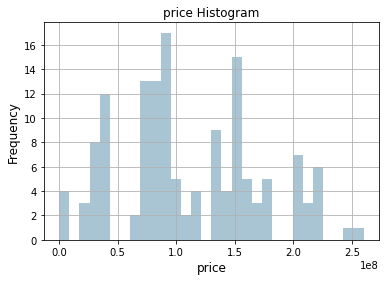

In [11]:
fig, ax = plt.subplots()
df['price'].hist(bins=30, color='#A9C5D3')
ax.set_title('price Histogram', fontsize=12)
ax.set_xlabel('price', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)



In [12]:


quantile_list = [0, .25, .5, .75, 1.]
quantiles = df['price'].quantile(quantile_list)
quantiles



0.00            0.0
0.25     75000000.0
0.50     95000000.0
0.75    150000000.0
1.00    260000000.0
Name: price, dtype: float64

Text(0, 0.5, 'Frequency')

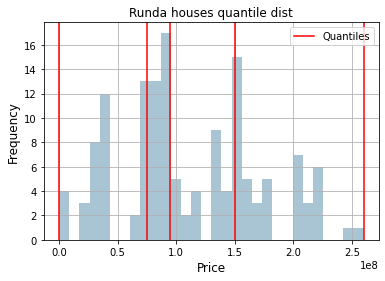

In [13]:
fig, ax = plt.subplots()
df['price'].hist(bins=30, color='#A9C5D3')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Runda houses quantile dist', fontsize=12)
ax.set_xlabel('Price', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [14]:
quantile_labels = ['Low', 'Fair', 'Medium', 'High']
df['price_class'] = pd.qcut(df['price'],  q=quantile_list)
df['price_class_label'] = pd.qcut(df['price'], 
                                                 q=quantile_list, labels=quantile_labels)
df.head(10)

,area,baths,beds,cars,description,externalFeatures,generalFeatures,internalFeatures,price,price_class,price_class_label
0,2428,8,6,0,\n6 bedroom houseAll rooms en-suiteSitting on ...,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],85000000,"(75000000.0, 95000000.0]",Fair
1,6001,3,4,0,\nUnbelievable!!Yet a unique house with charac...,"[' Fence ', ' Garden ']","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",75000000,"(-0.001, 75000000.0]",Low
2,0,3,4,3,"\nHOUSE FEATURES:* Ultra-modern 4 Bedrooms, 2 ...","[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Alarm ', ' Built in Cupboards ', ' Kitchen ...",27450000,"(-0.001, 75000000.0]",Low
3,800,5,5,0,\nA stunning modern Five bedroom house built o...,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Pets Allowe...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",340000,"(-0.001, 75000000.0]",Low
4,2833,5,5,0,\nRunda home 5 bedroom all en-suite- 2 living ...,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' CCTV ', ' Electricity Included ', ' Fibre I...","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",150000000,"(95000000.0, 150000000.0]",Medium
5,2023,8,8,0,\nThis is a newly built prime property located...,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",150000000,"(95000000.0, 150000000.0]",Medium
6,2023,5,5,0,\n5 Bedroom Home For SaleThis gorgeous propert...,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],200000000,"(150000000.0, 260000000.0]",High
7,506,4,4,0,\nGood!These is a well structured and designed...,"[' Bore Hole ', ' Electric Fence ', ' Fence ',...","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",28000000,"(-0.001, 75000000.0]",Low
8,2023,5,5,0,\nThis is a magnificent 5 bedroom house all en...,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",220000000,"(150000000.0, 260000000.0]",High
9,2833,7,5,0,\nIts Doubled Storeyed HouseSitting on 0.5 Acr...,"[' Bore Hole ', ' Electric Fence ', ' Garden ']","[' Backup Generator ', ' CCTV ', ' Pets Allowe...","[' Built in Cupboards ', ' Ensuite ', ' Kitche...",95000000,"(75000000.0, 95000000.0]",Fair


# One hot encoding of features

In [15]:
# convert to lists
from ast import literal_eval
df.loc[:,'generalFeatures'] = df.loc[:,'generalFeatures'].apply(lambda x: literal_eval(x))
df.loc[:,'internalFeatures'] = df.loc[:,'internalFeatures'].apply(lambda x: literal_eval(x))
df.loc[:,'externalFeatures'] = df.loc[:,'externalFeatures'].apply(lambda x: literal_eval(x))

In [16]:
all_features =set([]) 

def get_all_features(text):
  for i in range(len(text)):
  
   all_features.add(text[i].strip())


for i in range(len(df)):
  get_all_features(df['generalFeatures'][i])
  get_all_features(df['internalFeatures'][i])
  get_all_features(df['externalFeatures'][i])


print("All features ", type(all_features),  all_features)


All features  <class 'set'> {'Wheel Chair Friendly', 'Scenic View', 'Sea View', 'Electricity Included', 'Garden', 'Water Included', 'Kitchen', 'Alarm', 'Lift Elevator', 'Bore Hole', 'Balcony', 'Electric Fence', 'Pets Allowed', 'Golf Course', 'Fence', 'Fibre Internet', 'Ensuite', 'Backup Generator', 'CCTV', 'Walk In Closet', 'Built in Cupboards', 'Aircon'}


We first need to turn the features to individual column names with intial values of zero. Then iterate trhough the df giving a 1 to a house that has a feature.

In [17]:
# turn all features to column names
for feature in all_features:
  df[feature] = [0] * len(df)
 
df.head(2)  

,area,baths,beds,cars,description,externalFeatures,generalFeatures,internalFeatures,price,price_class,price_class_label,Wheel Chair Friendly,Scenic View,Sea View,Electricity Included,Garden,Water Included,Kitchen,Alarm,Lift Elevator,Bore Hole,Balcony,Electric Fence,Pets Allowed,Golf Course,Fence,Fibre Internet,Ensuite,Backup Generator,CCTV,Walk In Closet,Built in Cupboards,Aircon
0,2428,8,6,0,\n6 bedroom houseAll rooms en-suiteSitting on ...,"[ Built in Cupboards , Ensuite , Kitchen ]","[ Balcony , Fence , Garden ]",[],85000000,"(75000000.0, 95000000.0]",Fair,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6001,3,4,0,\nUnbelievable!!Yet a unique house with charac...,"[ Fence , Garden ]","[ Fibre Internet , Pets Allowed ]","[ Alarm , Built in Cupboards , Ensuite , Ki...",75000000,"(-0.001, 75000000.0]",Low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
def populate_feature( j, text):
   for i in range(len(text)):
     a = text[i].strip()
   
     df[a][j] = 1

for i in range(len(df)):
  populate_feature(i ,df['generalFeatures'][i])
  populate_feature(i , df['internalFeatures'][i])
  populate_feature(i ,df['externalFeatures'][i])

df.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,area,baths,beds,cars,description,externalFeatures,generalFeatures,internalFeatures,price,price_class,price_class_label,Wheel Chair Friendly,Scenic View,Sea View,Electricity Included,Garden,Water Included,Kitchen,Alarm,Lift Elevator,Bore Hole,Balcony,Electric Fence,Pets Allowed,Golf Course,Fence,Fibre Internet,Ensuite,Backup Generator,CCTV,Walk In Closet,Built in Cupboards,Aircon
0,2428,8,6,0,\n6 bedroom houseAll rooms en-suiteSitting on ...,"[ Built in Cupboards , Ensuite , Kitchen ]","[ Balcony , Fence , Garden ]",[],85000000,"(75000000.0, 95000000.0]",Fair,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
1,6001,3,4,0,\nUnbelievable!!Yet a unique house with charac...,"[ Fence , Garden ]","[ Fibre Internet , Pets Allowed ]","[ Alarm , Built in Cupboards , Ensuite , Ki...",75000000,"(-0.001, 75000000.0]",Low,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,0,1,1,0
